# Time Series.

Ahora que ya sabemos cómo verifica cuántos tweets mencionan una palabra o frase en un conjunto de datos de Twitter, vamos a contstruir sobre eso ilustrando cómo las menciones de palabras claves cambian con el timepo.

Los tweets sobre empresas, productos y cuestiones políticas varían según el día , la hora , los minutos e incluso el segundo.

Queremos poder capturar esa variación con el tiempo, cuando los datos se etiquetan con una fecha y hora , se les conoce como datos de *series de tiempo*
o  *time series*  o  *over time data*.


La estructura de los datos de series temporales generalmente contienen una fecha , hora y algun tipo de medida numérica.

### CÓDIGO A USAR:

* `pd.to_datetime` - Cuando se importa un archivo csv y se crea un marco de datos, los objetos de fecha y hora en el archivo se leen como un objeto de cadena en lugar de un objeto de fecha y hora y, por lo tanto, es muy difícil realizar operaciones como la diferencia horaria en una cadena en lugar de un objeto de fecha y hora . El método Pandas to_datetime () ayuda a convertir la cadena Date time en un objeto Python Date time.

* `set_index`- Pandas set_index () es un método para establecer una lista, serie o marco de datos como índice de un marco de datos. La columna de índice también se puede configurar mientras se crea un marco de datos. Pero a veces un marco de datos está hecho de dos o más marcos de datos y, por lo tanto, el índice posterior se puede cambiar usando este método.

* `.resample`- La función de Pandas dataframe.resample () se usa principalmente para datos de series de tiempo.

Una serie de tiempo es una serie de puntos de datos indexados (o listados o graficados) en orden de tiempo. Más comúnmente, una serie de tiempo es una secuencia tomada en puntos sucesivos igualmente espaciados en el tiempo. Es un método de conveniencia para conversión de frecuencia y remuestreo de series de tiempo. El objeto debe tener un índice similar a una fecha y hora (DatetimeIndex, PeriodIndex o TimedeltaIndex) o pasar valores similares a la fecha y hora a la palabra clave on o level.

## Creando un DataFrame de Series de Tiempo.

Los datos de series de tiempo se utilizan cuando queremos analizar o explorar la variación en el tiempo. Esto es útil al explorar datos de texto de Twitter si queremos rastrear la prevalencia de una palabra o un conjunto de palabras. 

El primer paso para hacer esto es convertir el DataFrame en un formato que se pueda manejar usando métodos de series temporales de Pandas. Eso se puede hacer convirtiendo el índice a un tipo de fecha y hora.

In [27]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ds_tweets = pd.read_csv("/content/data-science-hashtags.csv")
ds_tweets.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,extended_tweet-full_text,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quote_count,quoted_status,quoted_status-extended_tweet-full_text,quoted_status-text,quoted_status-user-screen_name,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,retweeted,retweeted_status,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user,user-screen_name
0,NaN,NaN,Thu Mar 01 07:02:41 +0000 2018,NaN,"{'hashtags': [{'text': 'python', 'indices': [8...",NaN,NaN,NaN,0,False,low,NaN,969105628747608064,969105628747608064,NaN,NaN,NaN,NaN,NaN,False,en,NaN,False,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,False,{'created_at': 'Thu Mar 01 06:47:35 +0000 2018...,NaN,Learning Penetration Testing With Python http...,pythonbot_,"<a href=""https://todo.mushfiqweb.com"" rel=""nof...",RT @pythonbot_: Learning Penetration Testing W...,1519887761662,False,"{'id': 67016746, 'id_str': '67016746', 'name':...",mushfiqweb
1,NaN,NaN,Thu Mar 01 07:57:08 +0000 2018,NaN,"{'hashtags': [{'text': 'Software', 'indices': ...",NaN,NaN,NaN,0,False,low,NaN,969119331530526721,969119331530526721,NaN,NaN,NaN,NaN,NaN,False,en,NaN,False,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,False,{'created_at': 'Thu Mar 01 07:54:04 +0000 2018...,NaN,Is Language Agnosticism the Future of #Softwar...,I_m_ranjeet,"<a href=""https://www.botlibre.com"" rel=""nofoll...",RT @I_m_ranjeet: Is Language Agnosticism the F...,1519891028660,False,"{'id': 962595301109518336, 'id_str': '96259530...",Dw_Develops


In [28]:
# Imprima created_at para ver el formato original de fecha y hora en los datos de Twitter
print(ds_tweets['created_at'].head())

0    Thu Mar 01 07:02:41 +0000 2018
1    Thu Mar 01 07:57:08 +0000 2018
2    Thu Mar 01 08:09:02 +0000 2018
3    Thu Mar 01 09:22:21 +0000 2018
4    Thu Mar 01 12:04:04 +0000 2018
Name: created_at, dtype: object


In [29]:
# Convierta la columna created_at en el objeto np.datetime
ds_tweets['created_at'] = pd.to_datetime(ds_tweets['created_at'])

In [30]:
#Imprimir created_at para ver el nuevo formato
print(ds_tweets['created_at'].head())



0   2018-03-01 07:02:41+00:00
1   2018-03-01 07:57:08+00:00
2   2018-03-01 08:09:02+00:00
3   2018-03-01 09:22:21+00:00
4   2018-03-01 12:04:04+00:00
Name: created_at, dtype: datetime64[ns, UTC]


In [31]:
# Establecer el índice de ds_tweets en created_at
ds_tweets = ds_tweets.set_index('created_at')

### Generando una frecuencia de medida

Necesitamos producir una métrica que pueda graficarse a lo largo del tiempo. Nuestra función check_word_in_tweet () devuelve una serie booleana.

Recuerda que el valor booleano es True == 1, por lo que podemos producir una columna para cada palabra clave que nos interese y usarla para comprender su prevalencia a lo largo del tiempo.

In [32]:
def check_word_in_tweet(word, data):
    """Comprueba si una palabra está en el texto de un conjunto de datos de Twitter. 
    Comprueba el texto y el tweet extendido (tweets de más de 140 caracteres) en busca de
     tweets, retweets y tweets citados.
    Devuelve una serie lógica de pandas.
    """
    contains_column = data['text'].str.contains(word, case = False)
    contains_column |= data['extended_tweet-full_text'].str.contains(word, case = False)
    contains_column |= data['quoted_status-text'].str.contains(word, case = False)
    contains_column |= data['quoted_status-extended_tweet-full_text'].str.contains(word, case = False)
    contains_column |= data['retweeted_status-text'].str.contains(word, case = False)
    contains_column |= data['retweeted_status-extended_tweet-full_text'].str.contains(word, case = False)
    return contains_column

In [33]:
# Creamos una nueva volumna
ds_tweets['python'] = check_word_in_tweet('#python',ds_tweets)

# Creamos una nueva volumna
ds_tweets['rstats'] = check_word_in_tweet('#rstats',ds_tweets)

### Trazar la frecuencia media

Por último, crearemos un promedio diario de las menciones de ambos hashtags y las trazaremos a lo largo del tiempo.

* Primero crearemos proporciones a partir de las dos series booleanas por día, luego las trazaremos. 

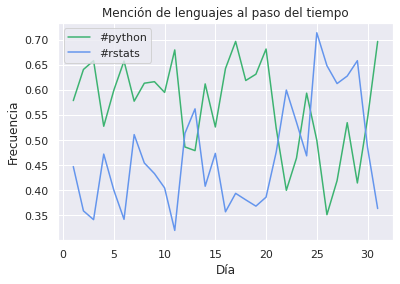

In [43]:
# estilo 
sns.set()
# Media de la columna python por dia
mean_python = ds_tweets['python'].resample('1 d').mean()

# Media de la columna rstats por dia
mean_rstats = ds_tweets['rstats'].resample('1 d').mean()

# Graficar python / rstats medios por día
_ = plt.plot(mean_python.index.day, mean_python, color = '#3CB371')
_ = plt.plot(mean_rstats.index.day, mean_rstats, color = '#6495ED')

# Agregar etiqeutas y mostrar
plt.xlabel('Día'); plt.ylabel('Frecuencia')
plt.title('Mención de lenguajes al paso del tiempo')
plt.legend(('#python', '#rstats'))
plt.show()